In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Imdb dataset
imdb_title_basics = pd.read_csv('data/title.basics.csv')
imdb_title_akas = pd.read_csv('data/title.akas.csv')
imdb_title_crew = pd.read_csv('data/title.crew.csv')
imdb_title_principals = pd.read_csv('data/title.principals.csv')
imdb_name_basics = pd.read_csv('data/name.basics.csv')
imdb_title_ratings = pd.read_csv('data/title.ratings.csv')
#Rotten tomato dataset
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', delimiter="\t")
rt_reviews = pd.read_csv('data/rt.reviews.tsv', delimiter="\t", encoding='latin-1')
#Box office Mojo dataset
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')
#The movies DB dataset
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
# The numbers dataset
tn_movies_budgets = pd.read_csv('data/tn.movie_budgets.csv')

# Facebook Likes vs Gross

In [3]:
#Import Data off different dataset. Taken from Kagle called IMDB 5000 Movie Dataset.
metadeta = pd.read_csv('data/movie_metadata.csv')

In [4]:
#Examine what datamframe to see what it looks like
metadeta.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
#See if there are any null values and types
metadeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
#Facebook launched around 2004, set dataframe to movie titles that were released after 2004
metadeta = metadeta[metadeta['title_year'] > 2004]

In [6]:
#Double checking to see minimum year
metadeta.min()

C:\Users\01aut\AppData\Local\Temp/ipykernel_13340/1380351631.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadeta.min()


director_name                                                    A. Raven Cruz
num_critic_for_reviews                                                     1.0
duration                                                                   7.0
director_facebook_likes                                                    0.0
actor_3_facebook_likes                                                     0.0
actor_1_facebook_likes                                                     0.0
gross                                                                    162.0
genres                                                                  Action
movie_title                                                           #Horror 
num_voted_users                                                              5
cast_total_facebook_likes                                                    0
facenumber_in_poster                                                       0.0
movie_imdb_link              http://www.imdb.com/tit

In [8]:
metadeta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2646 entries, 0 to 5041
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      2632 non-null   object 
 1   director_name              2646 non-null   object 
 2   num_critic_for_reviews     2610 non-null   float64
 3   duration                   2635 non-null   float64
 4   director_facebook_likes    2646 non-null   float64
 5   actor_3_facebook_likes     2634 non-null   float64
 6   actor_2_name               2638 non-null   object 
 7   actor_1_facebook_likes     2641 non-null   float64
 8   gross                      2156 non-null   float64
 9   genres                     2646 non-null   object 
 10  actor_1_name               2641 non-null   object 
 11  movie_title                2646 non-null   object 
 12  num_voted_users            2646 non-null   int64  
 13  cast_total_facebook_likes  2646 non-null   int64

<AxesSubplot:xlabel='movie_facebook_likes', ylabel='gross'>

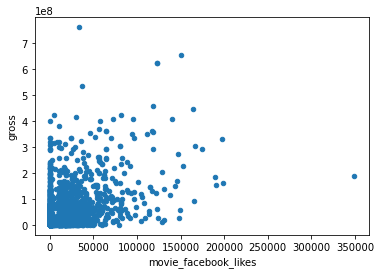

In [7]:
#initial plotting with panda to see general shape of movie likes
metadeta.plot.scatter('movie_facebook_likes', 'gross' )

In [8]:
#Drop NA values
metadeta = metadeta[metadeta['gross'].notna()]

In [9]:
metadeta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 5041
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      2154 non-null   object 
 1   director_name              2156 non-null   object 
 2   num_critic_for_reviews     2154 non-null   float64
 3   duration                   2154 non-null   float64
 4   director_facebook_likes    2156 non-null   float64
 5   actor_3_facebook_likes     2149 non-null   float64
 6   actor_2_name               2152 non-null   object 
 7   actor_1_facebook_likes     2154 non-null   float64
 8   gross                      2156 non-null   float64
 9   genres                     2156 non-null   object 
 10  actor_1_name               2154 non-null   object 
 11  movie_title                2156 non-null   object 
 12  num_voted_users            2156 non-null   int64  
 13  cast_total_facebook_likes  2156 non-null   int64

In [11]:
#checking correlation coefficient between the values
metadeta.corr()["gross"].sort_values()

facenumber_in_poster        -0.024948
aspect_ratio                 0.036908
budget                       0.099176
title_year                   0.119689
director_facebook_likes      0.174836
imdb_score                   0.197884
actor_1_facebook_likes       0.199291
actor_2_facebook_likes       0.299579
cast_total_facebook_likes    0.318170
duration                     0.324626
actor_3_facebook_likes       0.362785
movie_facebook_likes         0.455585
num_critic_for_reviews       0.557206
num_user_for_reviews         0.628843
num_voted_users              0.698520
gross                        1.000000
Name: gross, dtype: float64

In [10]:
#There are alot of categories of facebook likes, lets see what they looked like combined
metadeta['combined_likes'] = metadeta['actor_2_facebook_likes'] + metadeta['actor_1_facebook_likes'] + metadeta['actor_3_facebook_likes'] + metadeta['director_facebook_likes'] 

<AxesSubplot:xlabel='combined_likes', ylabel='gross'>

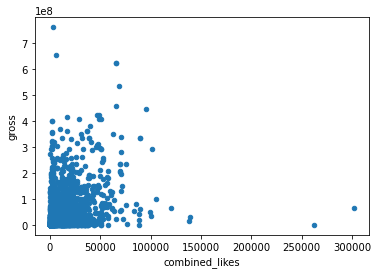

In [11]:
metadeta.plot.scatter('combined_likes' , 'gross' )

In [12]:
metadeta['combined_likes_movie'] = metadeta['actor_2_facebook_likes'] + metadeta['actor_1_facebook_likes'] +  metadeta['actor_3_facebook_likes'] + metadeta['director_facebook_likes'] +  metadeta['movie_facebook_likes'] + metadeta['cast_total_facebook_likes']

In [13]:
#Lets check the correlation coefficient, we can see that when all facebook likes are combined it produces are stronger correlation coefficient
metadeta.corr()["gross"].sort_values()

facenumber_in_poster        -0.024948
aspect_ratio                 0.036908
budget                       0.099176
title_year                   0.119689
director_facebook_likes      0.174836
imdb_score                   0.197884
actor_1_facebook_likes       0.199291
actor_2_facebook_likes       0.299579
combined_likes               0.302755
cast_total_facebook_likes    0.318170
duration                     0.324626
actor_3_facebook_likes       0.362785
movie_facebook_likes         0.455585
combined_likes_movie         0.465892
num_critic_for_reviews       0.557206
num_user_for_reviews         0.628843
num_voted_users              0.698520
gross                        1.000000
Name: gross, dtype: float64

<AxesSubplot:xlabel='combined_likes_movie', ylabel='gross'>

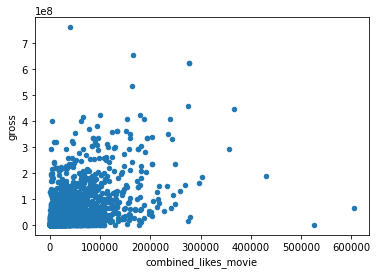

In [14]:
#General plot shape
metadeta.plot.scatter('combined_likes_movie' , 'gross' )

In [15]:
metadeta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 5041
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      2154 non-null   object 
 1   director_name              2156 non-null   object 
 2   num_critic_for_reviews     2154 non-null   float64
 3   duration                   2154 non-null   float64
 4   director_facebook_likes    2156 non-null   float64
 5   actor_3_facebook_likes     2149 non-null   float64
 6   actor_2_name               2152 non-null   object 
 7   actor_1_facebook_likes     2154 non-null   float64
 8   gross                      2156 non-null   float64
 9   genres                     2156 non-null   object 
 10  actor_1_name               2154 non-null   object 
 11  movie_title                2156 non-null   object 
 12  num_voted_users            2156 non-null   int64  
 13  cast_total_facebook_likes  2156 non-null   int64

In [16]:
#Lets split up everything by Genre now, formatting has to be right
metadeta['genres'] = metadeta['genres'].map(lambda x : x.replace("|", " ")) 
metadeta['genres'] = metadeta['genres'].map(lambda x : x.split())

In [21]:
metadeta

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,combined_likes,combined_likes_movie
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,2791.0,40625.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,"[Action, Adventure, Fantasy]",...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,46563.0,94913.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,"[Action, Adventure, Thriller]",...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,11554.0,108254.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,"[Action, Thriller]",...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,95000.0,365759.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,"[Action, Adventure, Sci-Fi]",...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,2277.0,28150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,Color,Jay Duplass,51.0,85.0,157.0,10.0,Katie Aselton,830.0,192467.0,"[Comedy, Drama, Romance]",...,USA,R,15000.0,2005.0,224.0,6.6,NaN,297,1221.0,2582.0
5023,Color,Daryl Wein,22.0,88.0,38.0,211.0,Heather Burns,331.0,76382.0,[Romance],...,USA,NaN,15000.0,2009.0,212.0,6.2,2.35,324,792.0,2662.0
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,[Thriller],...,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,NaN,74,0.0,74.0
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,"[Comedy, Drama]",...,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413,634.0,1737.0


In [17]:
#Explode will let us split them up
metadeta = metadeta.explode('genres')

In [18]:
metadeta

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,combined_likes,combined_likes_movie
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,2791.0,40625.0
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Adventure,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,2791.0,40625.0
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Fantasy,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,2791.0,40625.0
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,2791.0,40625.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,46563.0,94913.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy,...,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413,634.0,1737.0
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Drama,...,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413,634.0,1737.0
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy,...,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,2154.0,5200.0
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Drama,...,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,2154.0,5200.0


In [19]:
#Made extra columns to better scale the data visualization
metadeta['gross_adjusted'] = metadeta['gross'] / 1000000
metadeta['combined_likes_movie_adjusted'] = metadeta['combined_likes_movie'] / 1000

In [20]:
#Another line of cold to make the data chart looks better
metadeta.rename(columns={'genres': 'Genres'}, inplace = True)

In [31]:
metadeta['Genres'] = metadeta['Genres'].map(lambda x: "Musical" if x == "Music" else x)

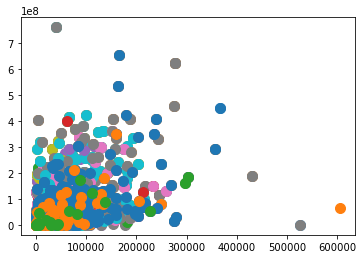

In [21]:
#plotting with for loop
fig, ax = plt.subplots()
groups = metadeta.groupby('Genres')
for name, group in groups:
    ax.plot(group['combined_likes_movie'], group['gross'] , marker='o', linestyle='', ms=10, 
label=name)


C:\Users\01aut\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


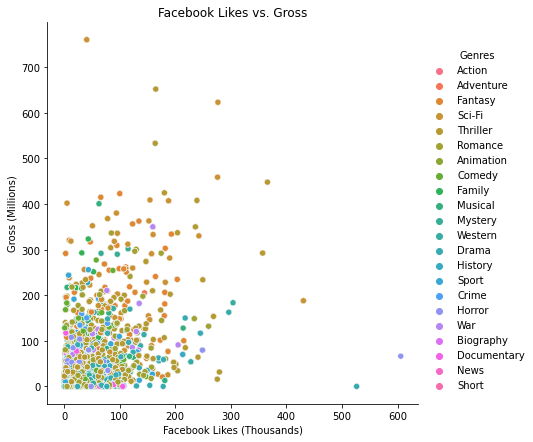

In [32]:
#Plotting and saving with SNS, it looks much cleaner
sns.pairplot(x_vars= ['combined_likes_movie_adjusted'], y_vars=["gross_adjusted"], data= metadeta, 
hue="Genres", size=6)

plt.title('Facebook Likes vs. Gross')
plt.xlabel('Facebook Likes (Thousands)')
plt.ylabel('Gross (Millions)')


plt.savefig('Facebook6.jpg', bbox_inches='tight' )

In [35]:
#Lets now only look at the 3 genres we are interested in
metadeta_top3 = metadeta[(metadeta['Genres'] == 'Horror') | (metadeta['Genres'] == 'Mystery') | (metadeta['Genres'] == 'Musical')]

C:\Users\01aut\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


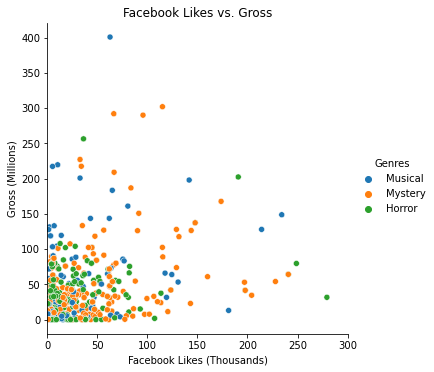

In [55]:
#Plotting the only 3 genres
sns.pairplot(x_vars= ['combined_likes_movie_adjusted'], y_vars=["gross_adjusted"], data= metadeta_top3, 
hue="Genres", size=5)

plt.title('Facebook Likes vs. Gross')
plt.xlabel('Facebook Likes (Thousands)')
plt.ylabel('Gross (Millions)')
plt.xlim(0, 300)

plt.savefig('Facebooktop3.jpg', bbox_inches='tight' );

In [37]:
#Checking the correlation between gross and combined likes movies under genres
metadeta.groupby('Genres')[["combined_likes_movie", "gross"]].corr()["gross"].loc[:,"combined_likes_movie"].sort_values()

Genres
Documentary    0.079296
Sport          0.205754
Horror         0.274817
Mystery        0.317863
Musical        0.321736
Animation      0.323789
Comedy         0.334132
Crime          0.431754
Romance        0.440537
Biography      0.463471
Drama          0.466650
Family         0.477682
Fantasy        0.487128
Action         0.487605
Adventure      0.526538
Thriller       0.536642
Sci-Fi         0.543116
History        0.629724
War            0.684955
Western        0.829149
News                NaN
Short               NaN
Name: gross, dtype: float64

In [38]:
#How does it compare with the grouped r value? 
metadeta.corr()['gross'].sort_values( ascending = False)

gross_adjusted                   1.000000
gross                            1.000000
num_voted_users                  0.685937
num_user_for_reviews             0.611073
num_critic_for_reviews           0.557141
combined_likes_movie_adjusted    0.463892
combined_likes_movie             0.463892
movie_facebook_likes             0.452599
actor_3_facebook_likes           0.336588
actor_2_facebook_likes           0.315923
cast_total_facebook_likes        0.314008
combined_likes                   0.298489
duration                         0.289331
imdb_score                       0.222230
actor_1_facebook_likes           0.194427
director_facebook_likes          0.156869
title_year                       0.133091
budget                           0.088976
aspect_ratio                     0.034805
facenumber_in_poster            -0.034790
Name: gross, dtype: float64

In [35]:
metadeta.groupby('Genres').sum().loc[:,"combined_likes_movie"].sort_values( ascending = False)

Genres
Drama          42565102.0
Action         27662055.0
Thriller       26982409.0
Adventure      25829685.0
Comedy         24846521.0
Sci-Fi         16157498.0
Romance        16051586.0
Fantasy        14956100.0
Crime          14190906.0
Family          9894327.0
Mystery         8965901.0
Biography       6983713.0
Horror          6670355.0
Animation       4661824.0
History         3212747.0
War             2990686.0
Sport           2589418.0
Music           2181478.0
Western         1553688.0
Musical         1372283.0
Documentary      570876.0
News              15318.0
Short                 0.0
Name: combined_likes_movie, dtype: float64

In [ ]:
#STOP HERE This is what someone else was looking at

In [38]:
metadeta["director_name"]

0        James Cameron
0        James Cameron
0        James Cameron
0        James Cameron
1       Gore Verbinski
             ...      
5037      Edward Burns
5037      Edward Burns
5041       Daniel Hsia
5041       Daniel Hsia
5041       Daniel Hsia
Name: director_name, Length: 6280, dtype: object

In [44]:
metadeta.groupby('Genres')[["director_name", "imdb_score"]].mean()

,imdb_score
Genres,
Action,6.314513
Adventure,6.504439
Animation,6.616667
Biography,7.107843
Comedy,6.179379
Crime,6.557550
Documentary,7.164615
Drama,6.709107
Family,6.263469


In [49]:
director_metadeta = metadeta_top3.groupby('director_name')["imdb_score"].mean().sort_values( ascending = False)

In [52]:
director_metadeta.head(20)

director_name
Damien Chazelle         8.500000
Ron Fricke              8.500000
Christopher Nolan       8.500000
Catherine Owens         8.400000
Asghar Farhadi          8.400000
Juan José Campanella    8.200000
Paul Greengrass         8.100000
Denis Villeneuve        7.966667
James Mangold           7.900000
Edgar Wright            7.900000
Quentin Tarantino       7.900000
David Fincher           7.866667
Christian Carion        7.800000
Giuseppe Tornatore      7.800000
Hong-jin Na             7.700000
Alex Garland            7.700000
Duncan Jones            7.700000
Anton Corbijn           7.700000
David Cronenberg        7.700000
Zack Snyder             7.700000
Name: imdb_score, dtype: float64

# IMDB Runtime vs Monetary Metric

In [43]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [44]:
imdb_title_basics['primary_title'] = imdb_title_basics['primary_title'].apply(lambda x: x.lower())
imdb_title_basics['primary_title'] = imdb_title_basics['primary_title'].apply(lambda x: x.replace(',',''))

In [45]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [46]:
tn_movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [47]:
tn_movies_budgets['movie'] = tn_movies_budgets['movie'].apply(lambda x: x.lower())
tn_movies_budgets['movie'] = tn_movies_budgets['movie'].apply(lambda x: x.replace(',',''))

tn_movies_budgets['production_budget'] = tn_movies_budgets['production_budget'].apply(lambda x: x.replace(',', ''))
tn_movies_budgets['production_budget'] = tn_movies_budgets['production_budget'].apply(lambda x: x.replace('$', ''))
tn_movies_budgets['production_budget'] = tn_movies_budgets['production_budget'].astype(int)


tn_movies_budgets['domestic_gross'] = tn_movies_budgets['domestic_gross'].apply(lambda x: x.replace(',', ''))
tn_movies_budgets['domestic_gross'] = tn_movies_budgets['domestic_gross'].apply(lambda x: x.replace('$', ''))
tn_movies_budgets['domestic_gross'] = tn_movies_budgets['domestic_gross'].astype(int)

tn_movies_budgets['worldwide_gross'] = tn_movies_budgets['worldwide_gross'].apply(lambda x: x.replace(',', ''))
tn_movies_budgets['worldwide_gross'] = tn_movies_budgets['worldwide_gross'].apply(lambda x: x.replace('$', ''))
tn_movies_budgets['worldwide_gross'] = tn_movies_budgets['worldwide_gross'].astype(float)

tn_movies_budgets["release_date"] = tn_movies_budgets["release_date"].apply(lambda x: x[-4:])
tn_movies_budgets["release_date"] = tn_movies_budgets["release_date"].astype(int)

In [48]:
tn_movies_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,avatar,425000000,760507625,2.776345e+09
1,2,2011,pirates of the caribbean: on stranger tides,410600000,241063875,1.045664e+09
2,3,2019,dark phoenix,350000000,42762350,1.497624e+08
3,4,2015,avengers: age of ultron,330600000,459005868,1.403014e+09
4,5,2017,star wars ep. viii: the last jedi,317000000,620181382,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018,red 11,7000,0,0.000000e+00
5778,79,1999,following,6000,48482,2.404950e+05
5779,80,2005,return to the land of wonders,5000,1338,1.338000e+03
5780,81,2015,a plague so pleasant,1400,0,0.000000e+00


In [49]:
tn_imbd_combined = tn_movies_budgets.merge(imdb_title_basics, how='inner', left_on= ['movie', 'release_date'] , right_on= ['primary_title', 'start_year'])

In [50]:
tn_imbd_combined

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,2,2011,pirates of the caribbean: on stranger tides,410600000,241063875,1.045664e+09,tt1298650,pirates of the caribbean: on stranger tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
1,3,2019,dark phoenix,350000000,42762350,1.497624e+08,tt6565702,dark phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
2,4,2015,avengers: age of ultron,330600000,459005868,1.403014e+09,tt2395427,avengers: age of ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
3,7,2018,avengers: infinity war,300000000,678815482,2.048134e+09,tt4154756,avengers: infinity war,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
4,9,2017,justice league,300000000,229024295,6.559452e+08,tt0974015,justice league,Justice League,2017,120.0,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...
1585,49,2015,exeter,25000,0,4.897920e+05,tt1945044,exeter,Exeter,2015,91.0,"Horror,Mystery,Thriller"
1586,49,2015,exeter,25000,0,4.897920e+05,tt4931374,exeter,Exeter,2015,92.0,NaN
1587,52,2015,dutch kills,25000,0,0.000000e+00,tt2759066,dutch kills,Dutch Kills,2015,90.0,"Crime,Drama,Thriller"
1588,59,2011,the ridges,17300,0,0.000000e+00,tt1781935,the ridges,The Ridges,2011,89.0,"Drama,Horror,Thriller"


In [51]:
tn_imbd_combined['roi'] = tn_imbd_combined['worldwide_gross'] / tn_imbd_combined['production_budget']
tn_imbd_combined['net_profit'] = tn_imbd_combined['worldwide_gross'] - tn_imbd_combined['production_budget']
tn_imbd_combined['profit_margin_percent'] = (((tn_imbd_combined['worldwide_gross'] / tn_imbd_combined['production_budget']) - 1) * 100)

In [52]:
tn_imbd_combined

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,roi,net_profit,profit_margin_percent
0,2,2011,pirates of the caribbean: on stranger tides,410600000,241063875,1.045664e+09,tt1298650,pirates of the caribbean: on stranger tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",2.546673,6.350639e+08,154.667286
1,3,2019,dark phoenix,350000000,42762350,1.497624e+08,tt6565702,dark phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",0.427892,-2.002376e+08,-57.210757
2,4,2015,avengers: age of ultron,330600000,459005868,1.403014e+09,tt2395427,avengers: age of ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",4.243841,1.072414e+09,324.384139
3,7,2018,avengers: infinity war,300000000,678815482,2.048134e+09,tt4154756,avengers: infinity war,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",6.827114,1.748134e+09,582.711400
4,9,2017,justice league,300000000,229024295,6.559452e+08,tt0974015,justice league,Justice League,2017,120.0,"Action,Adventure,Fantasy",2.186484,3.559452e+08,118.648403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,49,2015,exeter,25000,0,4.897920e+05,tt1945044,exeter,Exeter,2015,91.0,"Horror,Mystery,Thriller",19.591680,4.647920e+05,1859.168000
1586,49,2015,exeter,25000,0,4.897920e+05,tt4931374,exeter,Exeter,2015,92.0,NaN,19.591680,4.647920e+05,1859.168000
1587,52,2015,dutch kills,25000,0,0.000000e+00,tt2759066,dutch kills,Dutch Kills,2015,90.0,"Crime,Drama,Thriller",0.000000,-2.500000e+04,-100.000000
1588,59,2011,the ridges,17300,0,0.000000e+00,tt1781935,the ridges,The Ridges,2011,89.0,"Drama,Horror,Thriller",0.000000,-1.730000e+04,-100.000000


In [195]:
#tn_imbd_combined['genres'] = tn_imbd_combined['genres'].map(lambda x : x.split())
#tn_imbd_combined

In [59]:
#tn_imbd_combined = tn_imbd_combined.explode('genres')

In [60]:
#tn_imbd_combined.explode('genres')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,roi,net_profit,profit_margin_percent
0,2,2011,pirates of the caribbean: on stranger tides,410600000,241063875,1.045664e+09,tt1298650,pirates of the caribbean: on stranger tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"['Action,Adventure,Fantasy']",2.546673,6.350639e+08,154.667286
1,3,2019,dark phoenix,350000000,42762350,1.497624e+08,tt6565702,dark phoenix,Dark Phoenix,2019,113.0,"['Action,Adventure,Sci-Fi']",0.427892,-2.002376e+08,-57.210757
2,4,2015,avengers: age of ultron,330600000,459005868,1.403014e+09,tt2395427,avengers: age of ultron,Avengers: Age of Ultron,2015,141.0,"['Action,Adventure,Sci-Fi']",4.243841,1.072414e+09,324.384139
3,7,2018,avengers: infinity war,300000000,678815482,2.048134e+09,tt4154756,avengers: infinity war,Avengers: Infinity War,2018,149.0,"['Action,Adventure,Sci-Fi']",6.827114,1.748134e+09,582.711400
4,9,2017,justice league,300000000,229024295,6.559452e+08,tt0974015,justice league,Justice League,2017,120.0,"['Action,Adventure,Fantasy']",2.186484,3.559452e+08,118.648403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,49,2015,exeter,25000,0,4.897920e+05,tt1945044,exeter,Exeter,2015,91.0,"['Horror,Mystery,Thriller']",19.591680,4.647920e+05,1859.168000
1586,49,2015,exeter,25000,0,4.897920e+05,tt4931374,exeter,Exeter,2015,92.0,['nan'],19.591680,4.647920e+05,1859.168000
1587,52,2015,dutch kills,25000,0,0.000000e+00,tt2759066,dutch kills,Dutch Kills,2015,90.0,"['Crime,Drama,Thriller']",0.000000,-2.500000e+04,-100.000000
1588,59,2011,the ridges,17300,0,0.000000e+00,tt1781935,the ridges,The Ridges,2011,89.0,"['Drama,Horror,Thriller']",0.000000,-1.730000e+04,-100.000000


In [53]:
#sns.pairplot(x_vars= ['runtime_minutes'], y_vars=["roi"], data= tn_imbd_combined, 
#hue="genres", height=5)

In [56]:
tn_imbd_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1590 entries, 0 to 1589
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1590 non-null   int64  
 1   release_date           1590 non-null   int32  
 2   movie                  1590 non-null   object 
 3   production_budget      1590 non-null   int32  
 4   domestic_gross         1590 non-null   int32  
 5   worldwide_gross        1590 non-null   float64
 6   tconst                 1590 non-null   object 
 7   primary_title          1590 non-null   object 
 8   original_title         1590 non-null   object 
 9   start_year             1590 non-null   int64  
 10  runtime_minutes        1564 non-null   float64
 11  genres                 1584 non-null   object 
 12  roi                    1590 non-null   float64
 13  net_profit             1590 non-null   float64
 14  profit_margin_percent  1590 non-null   float64
dtypes: f

In [57]:
tn_imbd_combined = tn_imbd_combined[tn_imbd_combined['runtime_minutes'].notna()]

In [59]:
tn_imbd_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1564 entries, 0 to 1589
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1564 non-null   int64  
 1   release_date           1564 non-null   int32  
 2   movie                  1564 non-null   object 
 3   production_budget      1564 non-null   int32  
 4   domestic_gross         1564 non-null   int32  
 5   worldwide_gross        1564 non-null   float64
 6   tconst                 1564 non-null   object 
 7   primary_title          1564 non-null   object 
 8   original_title         1564 non-null   object 
 9   start_year             1564 non-null   int64  
 10  runtime_minutes        1564 non-null   float64
 11  genres                 1562 non-null   object 
 12  roi                    1564 non-null   float64
 13  net_profit             1564 non-null   float64
 14  profit_margin_percent  1564 non-null   float64
dtypes: f

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

ModuleNotFoundError: No module named 'mpl_scatter_density'

In [58]:
x = tn_imbd_combined['runtime_minutes']
y = tn_imbd_combined['profit_margin_percent']

import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
using_mpl_scatter_density(fig, x, y)
plt.show()

KeyError: '[1320, 1334, 1563, 449, 450, 257, 1531, 692, 451, 1143, 1293, 401, 378, 1502, 543, 230, 729, 255, 1079, 466, 1111, 254, 1356, 941, 1527, 274] not in index'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='runtime_minutes', ylabel='roi'>

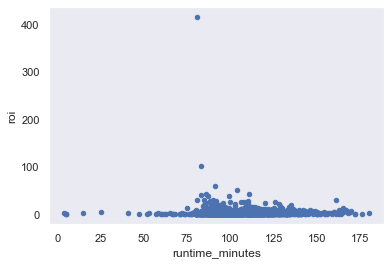

In [196]:
tn_imbd_combined.plot.scatter('runtime_minutes', 'roi')

<AxesSubplot:xlabel='runtime_minutes', ylabel='net_profit'>

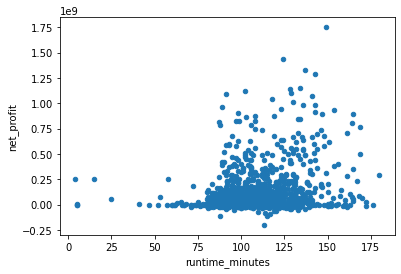

In [74]:
tn_imbd_combined.plot.scatter('runtime_minutes', 'net_profit')

<AxesSubplot:xlabel='runtime_minutes', ylabel='profit_margin_percent'>

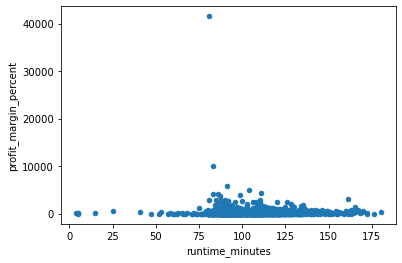

In [75]:
tn_imbd_combined.plot.scatter('runtime_minutes', 'profit_margin_percent')

In [198]:
tn_imbd_combined.sort_values("roi", ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,roi,net_profit,profit_margin_percent
1564,80,2015,the gallows,100000,22764410,41656474.0,tt2309260,the gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",416.564740,41556474.0,41556.474000
1464,12,2012,the devil inside,1000000,53262945,101759490.0,tt1560985,the devil inside,The Devil Inside,2012,83.0,Horror,101.759490,100759490.0,10075.949000
1341,65,2010,paranormal activity 2,3000000,84752907,177512032.0,tt1536044,paranormal activity 2,Paranormal Activity 2,2010,91.0,Horror,59.170677,174512032.0,5817.067733
1245,49,2017,get out,5000000,176040665,255367951.0,tt5052448,get out,Get Out,2017,104.0,"Horror,Mystery,Thriller",51.073590,250367951.0,5007.359020
1439,64,2016,moonlight,1500000,27854931,65245512.0,tt4975722,moonlight,Moonlight,2016,111.0,Drama,43.497008,63745512.0,4249.700800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,17,2018,bird box,19800000,0,0.0,tt2737304,bird box,Bird Box,2018,124.0,"Drama,Horror,Sci-Fi",0.000000,-19800000.0,-100.000000
885,15,2016,fight valley,20000000,0,0.0,tt4280822,fight valley,Fight Valley,2016,90.0,"Action,Drama",0.000000,-20000000.0,-100.000000
884,14,2014,dwegons and leprechauns,20000000,0,0.0,tt1134666,dwegons and leprechauns,Dwegons and Leprechauns,2014,98.0,Animation,0.000000,-20000000.0,-100.000000
1449,12,2011,the lion of judah,1500000,0,0.0,tt1212022,the lion of judah,The Lion of Judah,2011,87.0,Animation,0.000000,-1500000.0,-100.000000


In [204]:
tn_imbd_combined_gal= tn_imbd_combined[tn_imbd_combined['movie'] != 'the gallows']
tn_imbd_combined_drop = tn_imbd_combined_gal[tn_imbd_combined_gal['movie'] != 'the devil inside']
tn_imbd_combined_drop.sort_values("roi", ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,roi,net_profit,profit_margin_percent
1341,65,2010,paranormal activity 2,3000000,84752907,177512032.0,tt1536044,paranormal activity 2,Paranormal Activity 2,2010,91.0,Horror,59.170677,174512032.0,5817.067733
1245,49,2017,get out,5000000,176040665,255367951.0,tt5052448,get out,Get Out,2017,104.0,"Horror,Mystery,Thriller",51.073590,250367951.0,5007.359020
1439,64,2016,moonlight,1500000,27854931,65245512.0,tt4975722,moonlight,Moonlight,2016,111.0,Drama,43.497008,63745512.0,4249.700800
1465,18,2012,chernobyl diaries,1000000,18119640,42411721.0,tt1991245,chernobyl diaries,Chernobyl Diaries,2012,86.0,"Horror,Mystery,Thriller",42.411721,41411721.0,4141.172100
1246,51,2011,paranormal activity 3,5000000,104028807,207039844.0,tt1778304,paranormal activity 3,Paranormal Activity 3,2011,83.0,"Horror,Mystery,Thriller",41.407969,202039844.0,4040.796880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,32,2013,independence daysaster,1800000,0,0.0,tt2645670,independence daysaster,Independence Daysaster,2013,90.0,"Action,Adventure,Sci-Fi",0.000000,-1800000.0,-100.000000
378,53,2019,midway,59500000,0,0.0,tt6924650,midway,Midway,2019,NaN,"Action,Drama,History",0.000000,-59500000.0,-100.000000
377,52,2015,the ridiculous 6,60000000,0,0.0,tt2479478,the ridiculous 6,The Ridiculous 6,2015,119.0,"Comedy,Western",0.000000,-60000000.0,-100.000000
1449,12,2011,the lion of judah,1500000,0,0.0,tt1212022,the lion of judah,The Lion of Judah,2011,87.0,Animation,0.000000,-1500000.0,-100.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='runtime_minutes', ylabel='roi'>

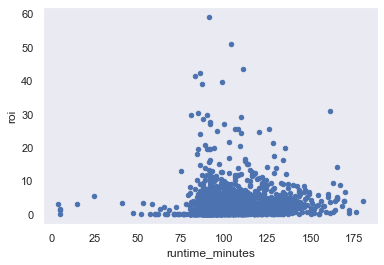

In [207]:
tn_imbd_combined_drop.plot.scatter('runtime_minutes', 'roi')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='runtime_minutes', ylabel='net_profit'>

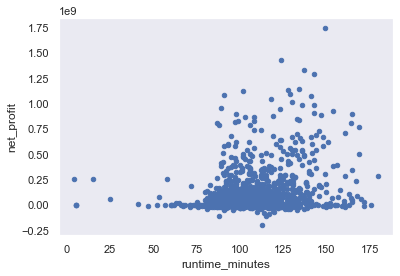

In [203]:
tn_imbd_combined_gal.plot.scatter('runtime_minutes', 'net_profit')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='runtime_minutes', ylabel='profit_margin_percent'>

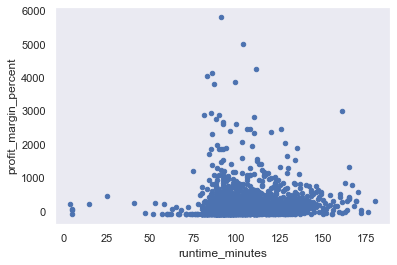

In [334]:
tn_imbd_combined_drop.plot.scatter('runtime_minutes', 'profit_margin_percent')


In [340]:
from scipy.stats import gaussian_kde

minutesprofit = np.vstack([tn_imbd_combined_drop['runtime_minutes'],tn_imbd_combined_drop['profit_margin_percent']])
z = gaussian_kde(minutesprofit)(minutesprofit)

minutes_profit_bar, ax = plt.subplots()
plt.scatter(
            title_budgets['runtime_minutes'], 
            title_budgets['profit_margin_percent'],
            c=z,
            s=10
            )
ax.set_title('Minutes vs Profit')
ax.set_xlabel('Minutes')
ax.set_ylabel('Profit')


ValueError: array must not contain infs or NaNs

In [2]:
imdb_title_crew

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [3]:
imdb_title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [6]:
imdb_name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [7]:
imdb_title_crew

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


# Hoang's preliminary data exploration

In [ ]:
movie_gross = pd.read_csv("data/bom.movie_gross.csv")

In [ ]:
movie_gross

In [ ]:
movie_gross.info()

In [ ]:
movie_gross = movie_gross.fillna(0)

In [ ]:
movie_gross.head()

In [ ]:
movie_gross.replace(',','', regex=True, inplace=True)

In [ ]:
movie_gross.head()

In [ ]:
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'], downcast = 'float')

In [ ]:
movie_gross.head()

In [ ]:
movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']

In [ ]:
movie_gross_sorted = movie_gross.sort_values('total_gross', ascending = False)
movie_gross_sorted.head(10)

In [ ]:
title_basics = pd.read_csv('data/title.basics.csv')

In [ ]:
title_basics

In [ ]:
title_basics.info()

In [ ]:
title_gross_movie = movie_gross.merge(title_basics, how = 'inner', left_on = "title", right_on = "primary_title" )

In [ ]:
title_gross_movie_sorted = title_gross_movie.sort_values('total_gross', ascending = False)
title_gross_movie_sorted.head(10)

#### Losing Values

In [ ]:
title_ratings = pd.read_csv('data/title.ratings.csv')

In [ ]:
title_ratings.info()

In [ ]:
title_ratings.head()

In [ ]:
movie_title_gross_rating = title_gross_movie.merge(title_ratings, how = 'inner', on = "tconst" )

In [ ]:
movie_title_gross_rating.head()

In [ ]:
movie_title_gross_rating_sorted = movie_title_gross_rating.sort_values('total_gross', ascending = False)
movie_title_gross_rating_sorted.head(10)

In [ ]:
movie_title_gross_rating.plot.scatter('averagerating', 'total_gross')

In [ ]:
movie_title_gross_rating.plot.bar('genres', 'total_gross')

In [ ]:
movie_title_gross_rating.plot.scatter('start_year', 'total_gross')

In [ ]:
movie_title_gross_rating.plot.scatter('runtime_minutes', 'total_gross')

In [ ]:
movie_title_gross_rating.plot.scatter('numvotes', 'total_gross')

In [ ]:
name_basic = pd.read_csv('data/name.basics.csv')

In [ ]:
name_basic.head()

In [ ]:
name_basic.info()

In [ ]:
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', sep='\t')

In [ ]:
rt_movie_info.head()

In [ ]:
rt_movie_info.info()

In [ ]:
rt_reviews = pd.read_csv('data/rt.reviews.tsv', sep='\t',  encoding='windows-1252')

In [ ]:
rt_reviews.head()

In [ ]:
rt_reviews.info()

In [ ]:
title_akas = pd.read_csv('data/title.akas.csv')

In [ ]:
title_akas.head()

In [ ]:
title_akas.info()

In [ ]:
title_crew = pd.read_csv('data/title.crew.csv')

In [ ]:
title_crew.head()

In [ ]:
title_crew.info()

In [ ]:
title_principals = pd.read_csv('data/title.principals.csv')

In [ ]:
title_principals.head()

In [ ]:
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')

In [ ]:
tmdb_movies.head()

In [ ]:
tmdb_movies.info()

In [ ]:
tn_movie_budget = pd.read_csv('data/tn.movie_budgets.csv')

In [ ]:
tn_movie_budget.head()

In [ ]:
tn_movie_budget.info()